# Análisis de datos
> Adrián Felipe Hernández Borda
>
> ---
>
> Universidad Pedagógica y Tccnológica de Colombia 
> Universidad Aurónoma de Sinaloa

---

El presente es un cuaderno de trabajo  y pruebas sobre el proyecto desarrollado en la **optativa de análisis de datos en python**
## Objetivos

Predecir las calificaciones (***Promedio / Matemática, Escritura y Lectura***)  de estudiantes con base a algunas características de su entorno y vida personal

---
## Importar Librerías


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
sns.set_style(style="ticks")

## Importar datos
Usando variables de cadenas de caracteres que contienen la ruta del conjunto de datos se importa el csv.

In [3]:
path = "./datasets/"
#file = "global-data-on-sustainable-energy.csv"
file = "Expanded_data_with_more_features.csv"
file_exp = "Original_data_with_more_rows.csv"
full_path = path+file
full_path_exp = path+file_exp
print(f"Dirección del conjunto de datos: '{full_path:s}'")


Dirección del conjunto de datos: './datasets/Expanded_data_with_more_features.csv'


In [4]:
data = pd.read_csv(full_path,sep=",")
sz = data.shape
print(f"Número de variables -> {sz[0]}\nEntradas del conjunto de datos -> {sz[1]}")
print("\n--- CABECERA DEL CONJUNTO DE DATOS ---\n")

display(data.head())

print("\n--- DESCRIPCIÓN ---\n")

display(data.describe())

#data_exp = pd.read_csv(full_path_exp,sep=",")

Número de variables -> 30641
Entradas del conjunto de datos -> 15

--- CABECERA DEL CONJUNTO DE DATOS ---



,ID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75



--- DESCRIPCIÓN ---



,ID,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


# Descripción del conjunto de datos

## Variables 
### Categóricas
1. `Gender`
2. `EthnicGroup` 
3. `ParentMaritalStatus`
4. `PracticeSport`
5. `IsFirstChild`
6. `TransportMeans`


### Ordinales
1. `LunchType` **Basado en que la merienda da energía que consume el cerebro**
2. `TestPrep`
3. `ParentEduc` **Basado en el grado de escolaridad**
4. `WklyStudyHours` **Son intervalos de tiempo, no es un número de punto flotante**

### Cuantitativas (Discretas)
1. `ID` **No aporta información para el análisis del conjunto de datos**
2. `NrSiblings`
3. `MathScore`
4. `ReadingScore`
5. `WritingScore` 

## Reescritura del conjunto de datos

Ahora el propósito es asignar a cada valor de una variable categórica un número entero, primero se crea unas funciones que permitan reemplazar los datos de un dataset por números. 

In [4]:
# Función que reemplaza los valores  de acuerdo a como aparezcan al leer de arriba abajo el conjunto de datos

def replace_values(df:pd.DataFrame):
    values = list()
    
    for k in range(len(df)):
        if not pd.isnull(df.iloc[k][df.keys()[0]]):
            if df.iloc[k][df.keys()[0]] not in values:
                values.append(df.iloc[k][df.keys()[0]])
    new_values = [k for k in range(len(values)) ]
    dic = dict(map(lambda x,y:(x,y),values,new_values))
    df = df.replace(to_replace=dic)
    print(f"{df.keys()[0]} -> {dic}")
    return df

# Función que reemplaza una columna de un conjunto de datos

def replace_col(df_main:pd.DataFrame,df_col:pd.DataFrame):
    df_main = df_main.drop(labels=df_col.keys()[0],axis=1)
    df_main = pd.concat([df_main,df_col],axis=1)
    return df_main

Ahora se puede seleccionar las columnas de las variables categóricas  de acuerdo a la inspección previa. Posteriormente el conjunto de datos se puede separar en tres conjuntos más sencillos a los que se aplicará las funciones definidas.

In [5]:
categoric_cols = ["Gender","EthnicGroup","ParentMaritalStatus","PracticeSport","IsFirstChild","TransportMeans"]
ordinal_cols = ["LunchType","TestPrep","ParentEduc","WklyStudyHours"]
cuantitative_cols = ["ID","NrSiblings","MathScore","ReadingScore","WritingScore"]

cols_to_change = [ordinal_cols,categoric_cols]

data_ordinal = data[ordinal_cols]
data_categoric = data[categoric_cols]
data_cuantitative = data[cuantitative_cols]

data_to_change = [data_ordinal,data_categoric]

Una forma de asignar valores numéricos para las variables cuyos valores sons tipo cadena de caracteres es el siguiente:
> No distingue jerarquía para los ordinales

In [6]:
for k in range(len(data_to_change)):
    for cols in cols_to_change[k]:
        data_to_change[k] = replace_col(data_to_change[k],replace_values(data_to_change[k][[cols]]))
    print("\n---\n")
    

LunchType -> {'standard': 0, 'free/reduced': 1}
TestPrep -> {'none': 0, 'completed': 1}
ParentEduc -> {"bachelor's degree": 0, 'some college': 1, "master's degree": 2, "associate's degree": 3, 'high school': 4, 'some high school': 5}
WklyStudyHours -> {'< 5': 0, '5 - 10': 1, '> 10': 2}

---

Gender -> {'female': 0, 'male': 1}
EthnicGroup -> {'group C': 0, 'group B': 1, 'group A': 2, 'group D': 3, 'group E': 4}
ParentMaritalStatus -> {'married': 0, 'single': 1, 'widowed': 2, 'divorced': 3}
PracticeSport -> {'regularly': 0, 'sometimes': 1, 'never': 2}
IsFirstChild -> {'yes': 0, 'no': 1}
TransportMeans -> {'school_bus': 0, 'private': 1}

---



Las variables ordinales toman valores que se mapearon a valores numéricos con base en el algoritmo de identifiación de resultados como sigue

In [7]:
data_ordinal = replace_col(data_ordinal,data_ordinal[["LunchType"]].replace(to_replace={'standard': 1, 'free/reduced': 0}))
data_ordinal = replace_col(data_ordinal,data_ordinal[["WklyStudyHours"]].replace(to_replace={'< 5': 0, '5 - 10': 1, '> 10': 2}))
data_ordinal = replace_col(data_ordinal,data_ordinal[["ParentEduc"]].replace(to_replace={"bachelor's degree": 4, 'some college': 3, "master's degree": 6, "associate's degree": 5, 'high school': 2, 'some high school': 1}))
data_ordinal = replace_col(data_ordinal,data_ordinal[["TestPrep"]].replace(to_replace={'none': 0, 'completed': 1}))

data_new = pd.concat([data_cuantitative,data_ordinal],axis=1)

print("--- CONJUNTO DE DATOS NUMÉRICO ---")
      
display(data_new.head())
data_new.to_csv(path_or_buf="./data_num_new.csv",sep=",")

--- CONJUNTO DE DATOS NUMÉRICO ---


,ID,NrSiblings,MathScore,ReadingScore,WritingScore,LunchType,WklyStudyHours,ParentEduc,TestPrep
0,0,3.0,71,71,74,1,0.0,4.0,0.0
1,1,0.0,69,90,88,1,1.0,3.0,NaN
2,2,4.0,87,93,91,1,0.0,6.0,0.0
3,3,1.0,45,56,42,0,1.0,5.0,0.0
4,4,0.0,76,78,75,1,1.0,3.0,0.0


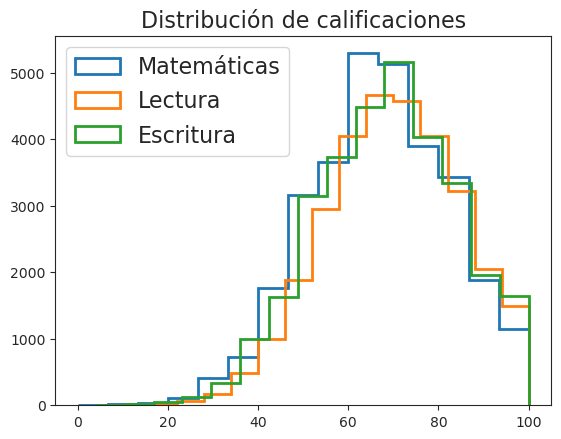

In [8]:
bins = int(1 + np.log2(sz[0]) ) # Regla de Sturges
fntsz = 16

plt.hist(data_new["MathScore"],bins=bins,histtype="step",linewidth=2,label="Matemáticas")
plt.hist(data_new["ReadingScore"],bins=bins,histtype="step",linewidth=2,label="Lectura")
plt.hist(data_new["WritingScore"],bins=bins,histtype="step",linewidth=2,label="Escritura")

plt.title("Distribución de calificaciones",fontsize=fntsz)
plt.legend(fontsize=fntsz)
plt.show()

La distribución entre asignaturas es similar, luego vale al pena pensar en un promedio entre las 3 asignaturas. Otra manera de visualizarlo es encontrando dicho promedio y viendo la correlación entre los datos de las materias y el promedio.

In [9]:
MeanScore = pd.DataFrame(data={"MeanScore":[np.mean(data_new[["MathScore","ReadingScore","WritingScore"]].iloc[k]) for k in range(sz[0])]})

In [10]:
data_scores = pd.concat([data_new[["MathScore","WritingScore","ReadingScore"]],MeanScore] ,axis=1)

/home/adrian/miniconda3/envs/adat/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


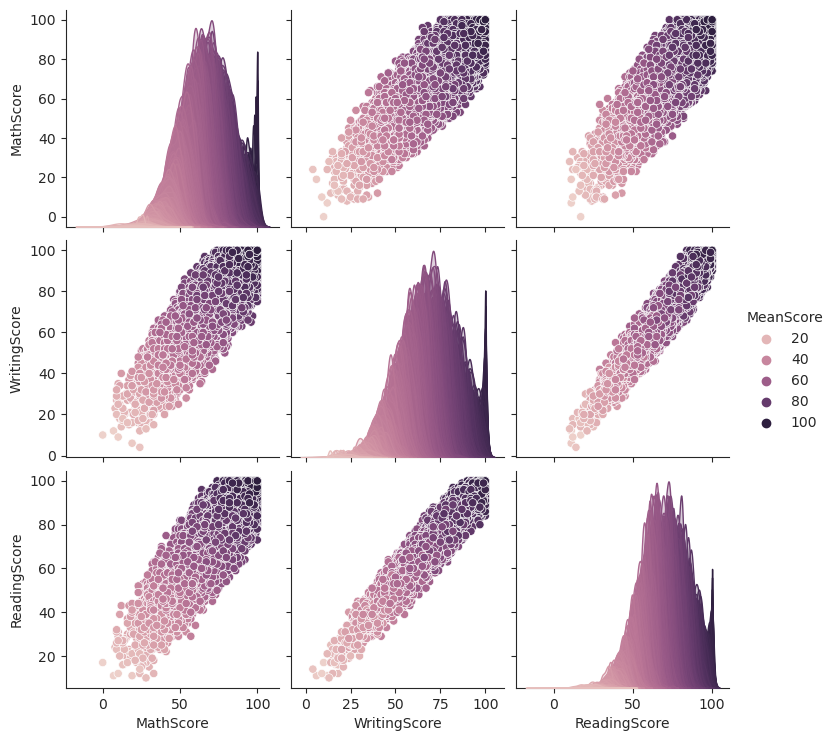

In [11]:
sns.pairplot( data=data_scores,dropna=True,vars=["MathScore","WritingScore","ReadingScore"],hue="MeanScore" )

In [12]:
data_new = data_new.drop(labels=["MathScore","ReadingScore","WritingScore"],axis=1)
data_new = pd.concat([data_new,MeanScore],axis=1)
data_new.head()

,ID,NrSiblings,LunchType,WklyStudyHours,ParentEduc,TestPrep,MeanScore
0,0,3.0,1,0.0,4.0,0.0,72.000000
1,1,0.0,1,1.0,3.0,NaN,82.333333
2,2,4.0,1,0.0,6.0,0.0,90.333333
3,3,1.0,0,1.0,5.0,0.0,47.666667
4,4,0.0,1,1.0,3.0,0.0,76.333333


## Correlación de los datos

La matriz de correlación a continuación muestra 

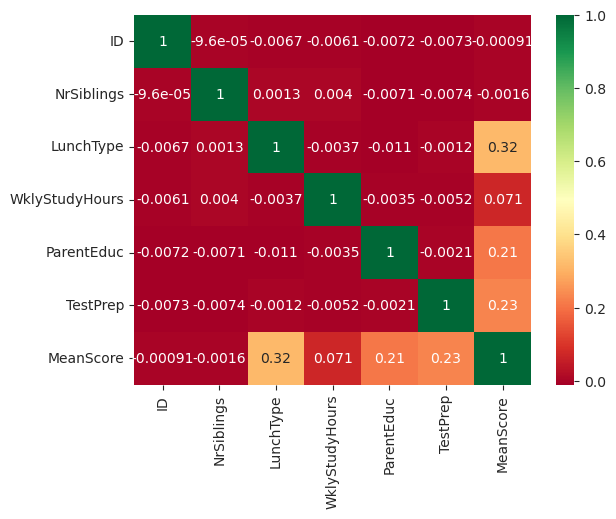

In [13]:
def corr_matrix (df:pd.DataFrame):
    corr = df.corr()
    sns.heatmap(data=corr,annot=True,cbar=True,cmap="RdYlGn")
corr_matrix(data)
corr_matrix(data_new)

## Variables más relevantes
1. `LunchType`
2. `TestPrep`
3. `ParentEduc`

## Variables menos relevantes
1. `ID`
2. `NrSiblings`
3. `ẀklyStudyHours`


/home/adrian/miniconda3/envs/adat/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


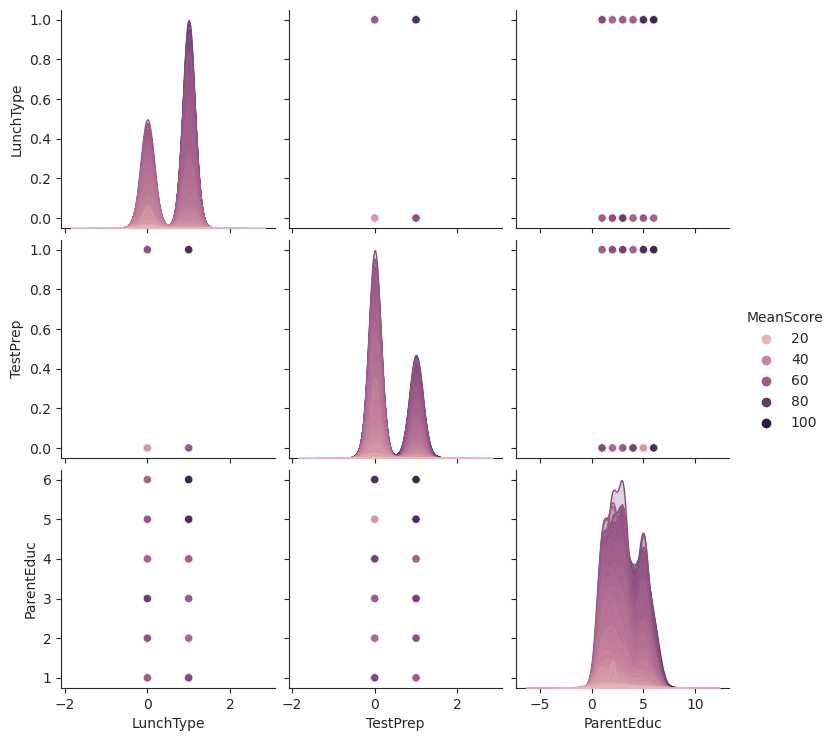

In [14]:
sns.pairplot(data_new,hue="MeanScore",dropna=True,vars=["LunchType","TestPrep","ParentEduc"])

## Análisis de variables con Scikit-Learn

### importar los módulos de selección

se usará la métrica de $\chi^{2}$, Fisher

In [15]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [17]:

'''predict_var = data_new[["MeanScore"]].fillna(np.mean(data_new[["MeanScore"]]))

for col in list(data_new.columns.values):
    data_new = data_new[[col]].fillna(np.mean(data_new[[col]]))
train_set = data_new.drop(labels="MeanScore",axis=1)
n_atrib = 3 
cols = list(data_new.columns.values)

best_vars = SelectKBest(f_classif,k=n_atrib).fit(train_set,predict_var)
'''

'predict_var = data_new[["MeanScore"]].fillna(np.mean(data_new[["MeanScore"]]))\n\nfor col in list(data_new.columns.values):\n    data_new = data_new[[col]].fillna(np.mean(data_new[[col]]))\ntrain_set = data_new.drop(labels="MeanScore",axis=1)\nn_atrib = 3 \ncols = list(data_new.columns.values)\n\nbest_vars = SelectKBest(f_classif,k=n_atrib).fit(train_set,predict_var)\n'

In [9]:
## Dont forget

print(pd.get_dummies(data[["ParentEduc"]]).columns.values)

["ParentEduc_associate's degree" "ParentEduc_bachelor's degree"
 'ParentEduc_high school' "ParentEduc_master's degree"
 'ParentEduc_some college' 'ParentEduc_some high school']
